# Shritesh_Jagtap_Customer_Personality_Analysis

### Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers.

### Customer Personality Analysis
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,confusion_matrix,roc_auc_score,plot_confusion_matrix
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.model_selection import cross_val_score

In [3]:
cust_d= pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv',header=0,sep=';')
cust_d

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
cust_d.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df=cust_d.copy()

In [6]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df=df.rename(columns={'MntWines':'wines','MntFruits':'fruits','MntMeatProducts':'meat','MntFishProducts':'fish','MntSweetProducts':'sweets','MntGoldProds':'gold'})

In [9]:
df['wines'].values

array([635,  11, 426, ..., 908, 428,  84])

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fish',
       'sweets', 'gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
df['Pur_W'] = df.apply(lambda x: 'wines' if x['wines'] >
                     x['fruits'] and x['wines'] > x['meat'] and x['wines'] > x['fish'] and x['wines'] > x['sweets'] and x['wines'] > x['gold'] else '', axis=1)

In [12]:
df['Pur_F'] = df.apply(lambda x: 'fruits' if x['fruits'] >
                     x['wines'] and x['fruits'] > x['meat'] and x['fruits'] > x['fish'] and x['fruits'] > x['sweets'] and x['fruits'] > x['gold'] else '', axis=1)

In [13]:
df['Pur_M'] = df.apply(lambda x: 'meat' if x['meat'] >
                     x['fruits'] and x['meat'] > x['wines'] and x['meat'] > x['fish'] and x['meat'] > x['sweets'] and x['meat'] > x['gold'] else '', axis=1)

In [14]:
df['Pur_Fi'] = df.apply(lambda x: 'fish' if x['fish'] >
                     x['fruits'] and x['fish'] > x['meat'] and x['fish'] > x['wines'] and x['fish'] > x['sweets'] and x['fish'] > x['gold'] else '', axis=1)

In [15]:
df['Pur_Sw'] = df.apply(lambda x: 'sweets' if x['sweets'] >
                     x['fruits'] and x['sweets'] > x['meat'] and x['sweets'] > x['fish'] and x['sweets'] > x['wines'] and x['sweets'] > x['gold'] else '', axis=1)

In [16]:
df['Pur_G'] = df.apply(lambda x: 'gold' if x['gold'] >
                     x['fruits'] and x['gold'] > x['meat'] and x['gold'] > x['fish'] and x['gold'] > x['sweets'] and x['gold'] > x['wines'] else '', axis=1)

In [17]:
df['Items_Purchased']= df['Pur_W']+ df['Pur_F']+ df['Pur_M']+df['Pur_Fi']+df['Pur_Sw']+df['Pur_G']

In [18]:
df=df.replace('','Common_Price')

In [19]:
df['Items_Purchased'].value_counts()

wines           1507
meat             433
gold             168
fish              55
Common_Price      52
sweets            14
fruits            11
Name: Items_Purchased, dtype: int64

In [20]:
df['Deals'] = df.apply(lambda x: 'deal' if x['NumDealsPurchases'] >
                     x['NumCatalogPurchases'] and x['NumDealsPurchases'] > x['NumWebPurchases'] and x['NumDealsPurchases'] > x['NumStorePurchases']  else '', axis=1)

In [21]:
df['Catl'] = df.apply(lambda x: 'catalogue' if x['NumCatalogPurchases'] >
                     x['NumDealsPurchases'] and x['NumCatalogPurchases'] > x['NumWebPurchases'] and x['NumCatalogPurchases'] > x['NumStorePurchases']  else '', axis=1)

In [22]:
df['Web'] = df.apply(lambda x: 'web' if x['NumWebPurchases'] >
                     x['NumCatalogPurchases'] and x['NumWebPurchases'] > x['NumDealsPurchases'] and x['NumWebPurchases'] > x['NumStorePurchases']  else '', axis=1)

In [23]:
df['Store'] = df.apply(lambda x: 'store' if x['NumStorePurchases'] >
                     x['NumCatalogPurchases'] and x['NumStorePurchases'] > x['NumDealsPurchases'] and x['NumStorePurchases'] > x['NumWebPurchases']  else '', axis=1)

In [24]:
df['most_purchases']= df['Deals']+ df['Catl']+ df['Web']+ df['Store']

In [25]:
df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','most_purchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,most_purchases
0,3,8,10,4,catalogue
1,2,1,1,2,
2,1,8,2,10,store
3,2,2,0,4,store
4,5,5,3,6,store
...,...,...,...,...,...
2235,2,9,3,4,web
2236,7,8,2,5,web
2237,1,2,3,13,store
2238,2,6,5,10,store


In [26]:
df=df.replace('','morethan1')

In [27]:
df['most_purchases'].value_counts()

store        1352
morethan1     364
web           276
catalogue     134
deal          114
Name: most_purchases, dtype: int64

In [28]:
df['Total_amt_Products']=df['wines']+df['fruits']+df['meat']+df['fish']+df['sweets']+df['gold']

In [29]:
df['Total_Purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [30]:
df['Total_Campaign']=df['AcceptedCmp1']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp2']

In [31]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fish',
       'sweets', 'gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Pur_W', 'Pur_F', 'Pur_M', 'Pur_Fi', 'Pur_Sw', 'Pur_G',
       'Items_Purchased', 'Deals', 'Catl', 'Web', 'Store', 'most_purchases',
       'Total_amt_Products', 'Total_Purchases', 'Total_Campaign'],
      dtype='object')

In [32]:
data=df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fish',
       'sweets', 'gold','Complain','Response','Items_Purchased', 'most_purchases',
       'Total_amt_Products', 'Total_Purchases', 'Total_Campaign']]

In [33]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,wines,fruits,meat,fish,sweets,gold,Complain,Response,Items_Purchased,most_purchases,Total_amt_Products,Total_Purchases,Total_Campaign
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,0,1,wines,catalogue,1617,25,0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,0,0,wines,morethan1,27,6,0
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,0,0,wines,store,776,21,0
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,0,0,meat,store,53,8,0
4,5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,0,0,wines,store,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,0,0,wines,web,1341,18,0
2236,4001,1946,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,0,0,wines,web,444,22,1
2237,7270,1981,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,0,0,wines,store,1241,19,1
2238,8235,1956,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,0,0,wines,store,843,23,0


## EDA

In [34]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fish', 'sweets',
       'gold', 'Complain', 'Response', 'Items_Purchased', 'most_purchases',
       'Total_amt_Products', 'Total_Purchases', 'Total_Campaign'],
      dtype='object')

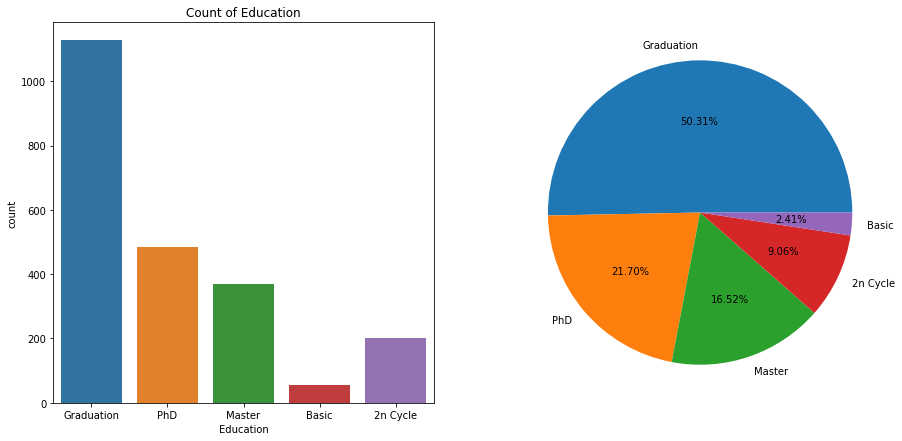

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Education")                  
percentage = data["Education"].value_counts()         
labels = list(data["Education"].value_counts().index) 

sb.countplot(x = data["Education"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

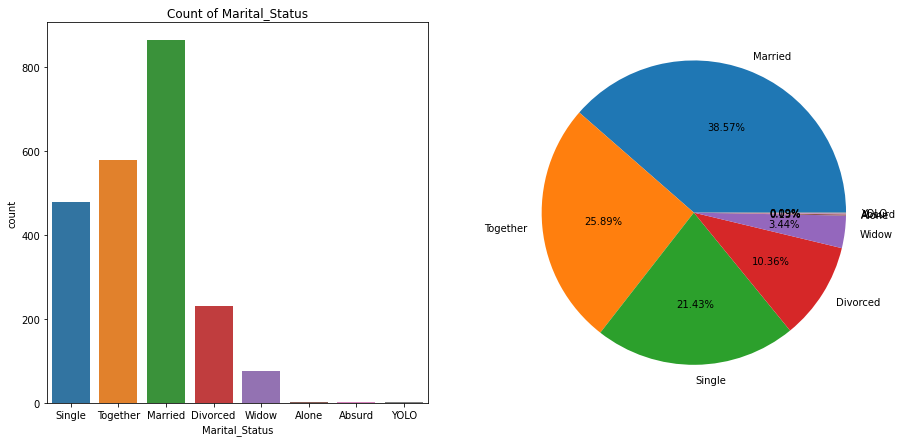

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Marital_Status")                  
percentage = data["Marital_Status"].value_counts()         
labels = list(data["Marital_Status"].value_counts().index) 

sb.countplot(x = data["Marital_Status"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

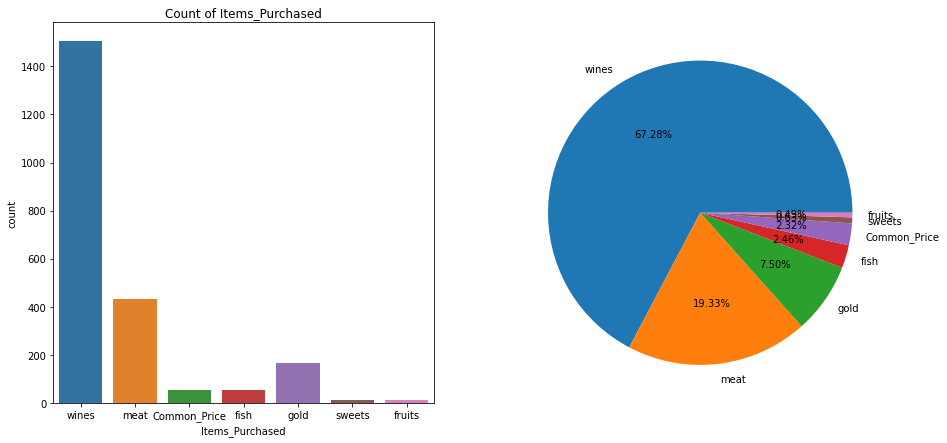

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Items_Purchased")                  
percentage = data["Items_Purchased"].value_counts()         
labels = list(data["Items_Purchased"].value_counts().index) 

sb.countplot(x = data["Items_Purchased"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

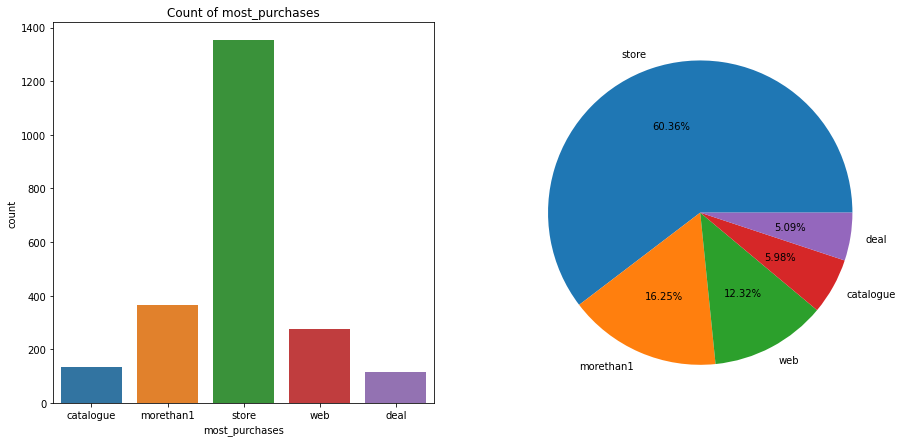

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of most_purchases")                  
percentage = data["most_purchases"].value_counts()         
labels = list(data["most_purchases"].value_counts().index) 

sb.countplot(x = data["most_purchases"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

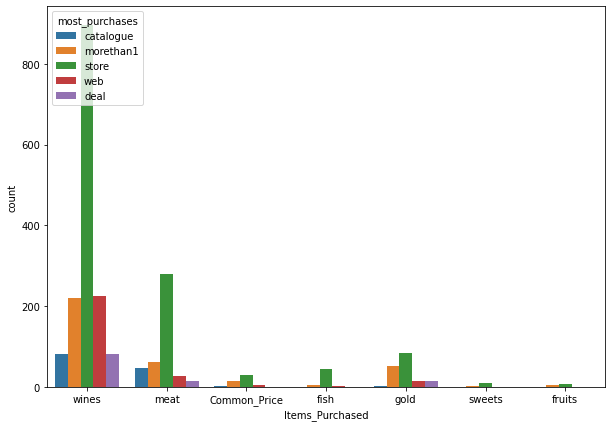

In [40]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Items_Purchased", hue = "most_purchases", data = data)
plt.show()

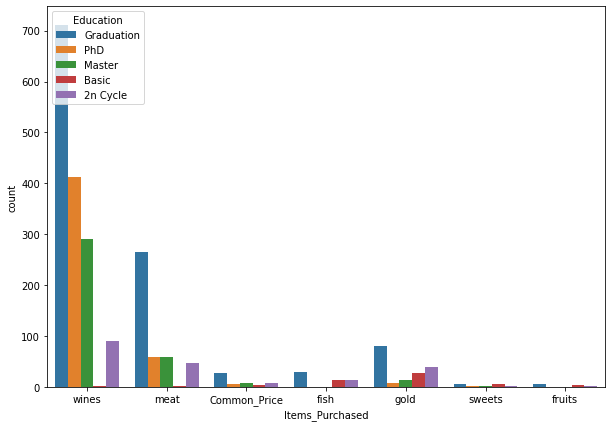

In [41]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Items_Purchased", hue = "Education", data = data)
plt.show()

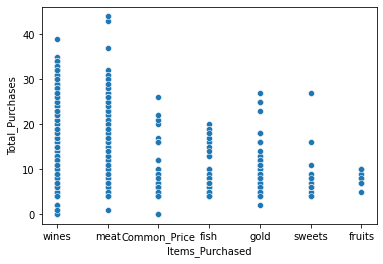

In [42]:
sb.scatterplot(data["Items_Purchased"],data['Total_Purchases'])

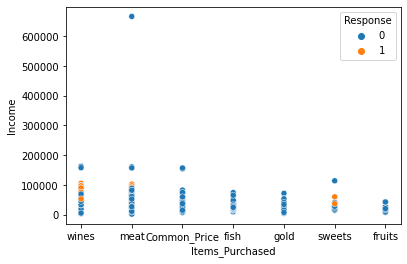

In [43]:
sb.scatterplot(data["Items_Purchased"],data['Income'],data['Response'])

### EDA CONCLUSION:
1. Graduated Customers are more. \
2. Married Customers are more. \
3. Money is spent on wines and meat products at high. \
4. Most of Purchases are made from Store. \
5. Every Purchases contains high money spent on wines and meat. \
6. Graduated Customers have spent high amounts in every type of products. \
7. Wines,Meat and Sweets products purchasing customers have given response.

## Clustering

In [44]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'wines', 'fruits', 'meat', 'fish', 'sweets',
       'gold', 'Complain', 'Response', 'Items_Purchased', 'most_purchases',
       'Total_amt_Products', 'Total_Purchases', 'Total_Campaign'],
      dtype='object')

In [45]:
x=data.iloc[:,[17,4]].values

In [46]:
from sklearn.cluster import KMeans
errors=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

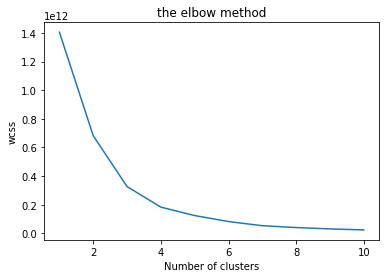

In [47]:
plt.plot(range(1,11) ,errors)
plt.title("the elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [48]:
kmeans=KMeans(n_clusters=4,random_state=42)
y_kmeans=kmeans.fit_predict(x)

Text(0, 0.5, 'Income')

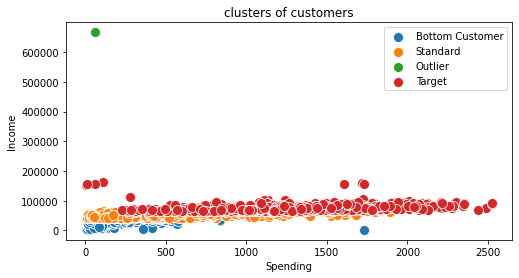

In [49]:
plt.figure(figsize=(8,4))
sb.scatterplot(x=x[y_kmeans==0,0] ,y=x[y_kmeans==0,1] ,s=100,label="Bottom Customer")
sb.scatterplot(x=x[y_kmeans==1,0] ,y=x[y_kmeans==1,1],s=100,label="Standard")
sb.scatterplot(x=x[y_kmeans==2,0] ,y=x[y_kmeans==2,1] ,s=100,label="Outlier")
sb.scatterplot(x=x[y_kmeans==3,0] ,y=x[y_kmeans==3,1],s=100,label="Target")
#sb.scatterplot(x=x[y_kmeans==4,0] ,y=x[y_kmeans==4,1],s=100,label="Negative_Sentiments")

plt.title("clusters of customers")
plt.xlabel("Spending")
plt.ylabel("Income")

In [50]:
clusters=[]
for c in y_kmeans:
    if c==0:
        clusters.append("Bottom Customer")
    elif c==1:
        clusters.append("Standard")
    elif c==2:
        clusters.append("Outlier")
    elif c==3:
        clusters.append("Target")
   
        
        
data["clusters"]=clusters 

## TOP CUSTOMER

In [51]:
top=data[(data['clusters']=='Target')]

In [52]:
top['ID'][:10]

2     4141
15    2114
18    6565
23    4047
29    1966
34    8755
36    4339
40    8601
45    1371
49    6566
Name: ID, dtype: int64

## BOTTOM CUSTOMER

In [53]:
bot=data[(data['clusters']=='Bottom Customer')]

In [54]:
bot['ID'][:10]

3     6182
7     6177
8     4855
9     5899
11     387
14    2569
17    4939
19    2278
20    9360
21    5376
Name: ID, dtype: int64

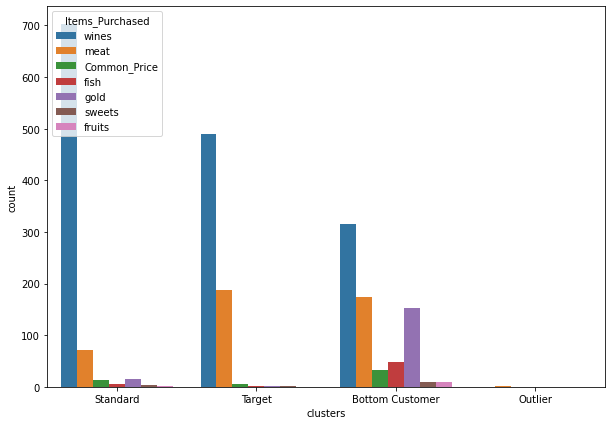

In [55]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "clusters", hue = "Items_Purchased", data = data)
plt.show()

### CUSTOMER SEGMENTATION
1. The customers are divided into 4 parts: \
       a. Target: This Customers are having High Income and High range of Spending Scores. \
       b. Standard: This Customers are having Moderate Income and Moderate range of Spending Scores. \
       c. Bottom Customer: This Customers are having low Income and low range of Spending Scores. \
       d. Outlier:This Customers are having High Income and low range of Spending Scores. \

### Conclusion: 
1. The Customer in Outlier has only spent money on Meat preoducts. \
2. The other segments of customers have spent a lot money on Wines and Meat Products. \
3. The Other products such as Fruits,Fish and Sweets are the products should be working on.

### Suggestions: 
 In order to increase the sales of bottom products the offers and discounts should be provided.
     

In [57]:
#data.to_csv("Market_Camp.csv")

## FUTURE PREDICTIONS

### The Predictions are done using TABLEAU and screenshots are shown using MATPLOTLIB.

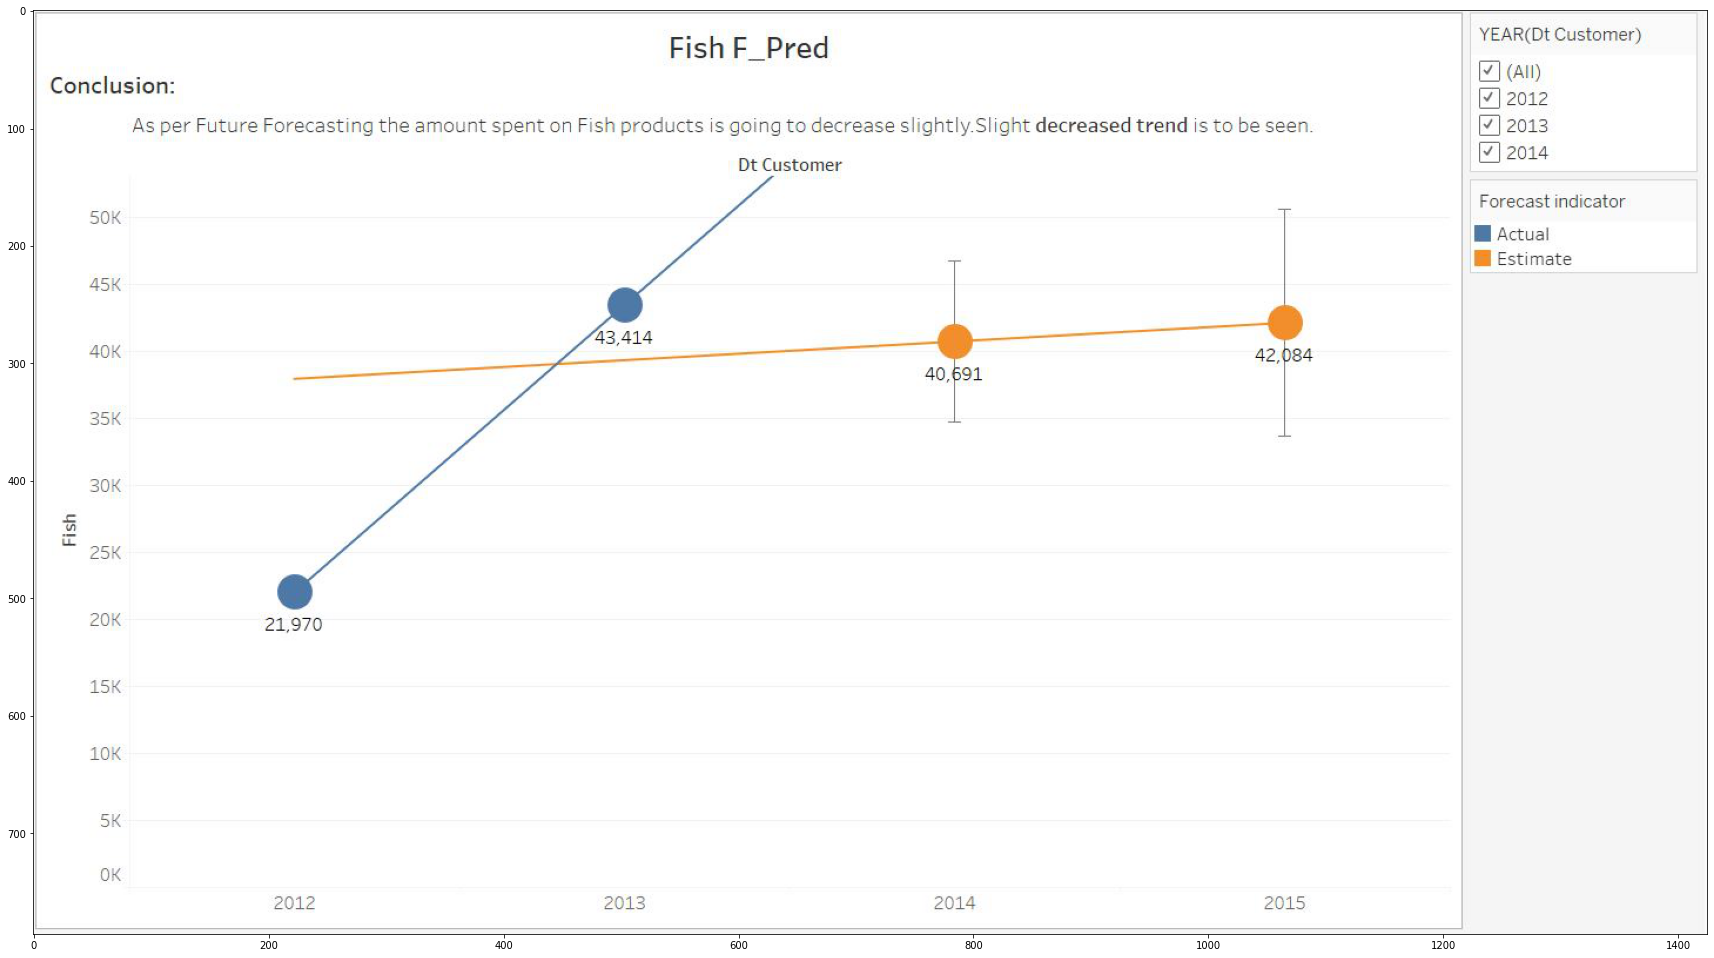

In [98]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read the given Images
fish = mpimg.imread('/content/sample_data/Capturefish.JPG')
 
# Output the given Images
plt.figure(figsize=(30,20))
plt.imshow(fish )

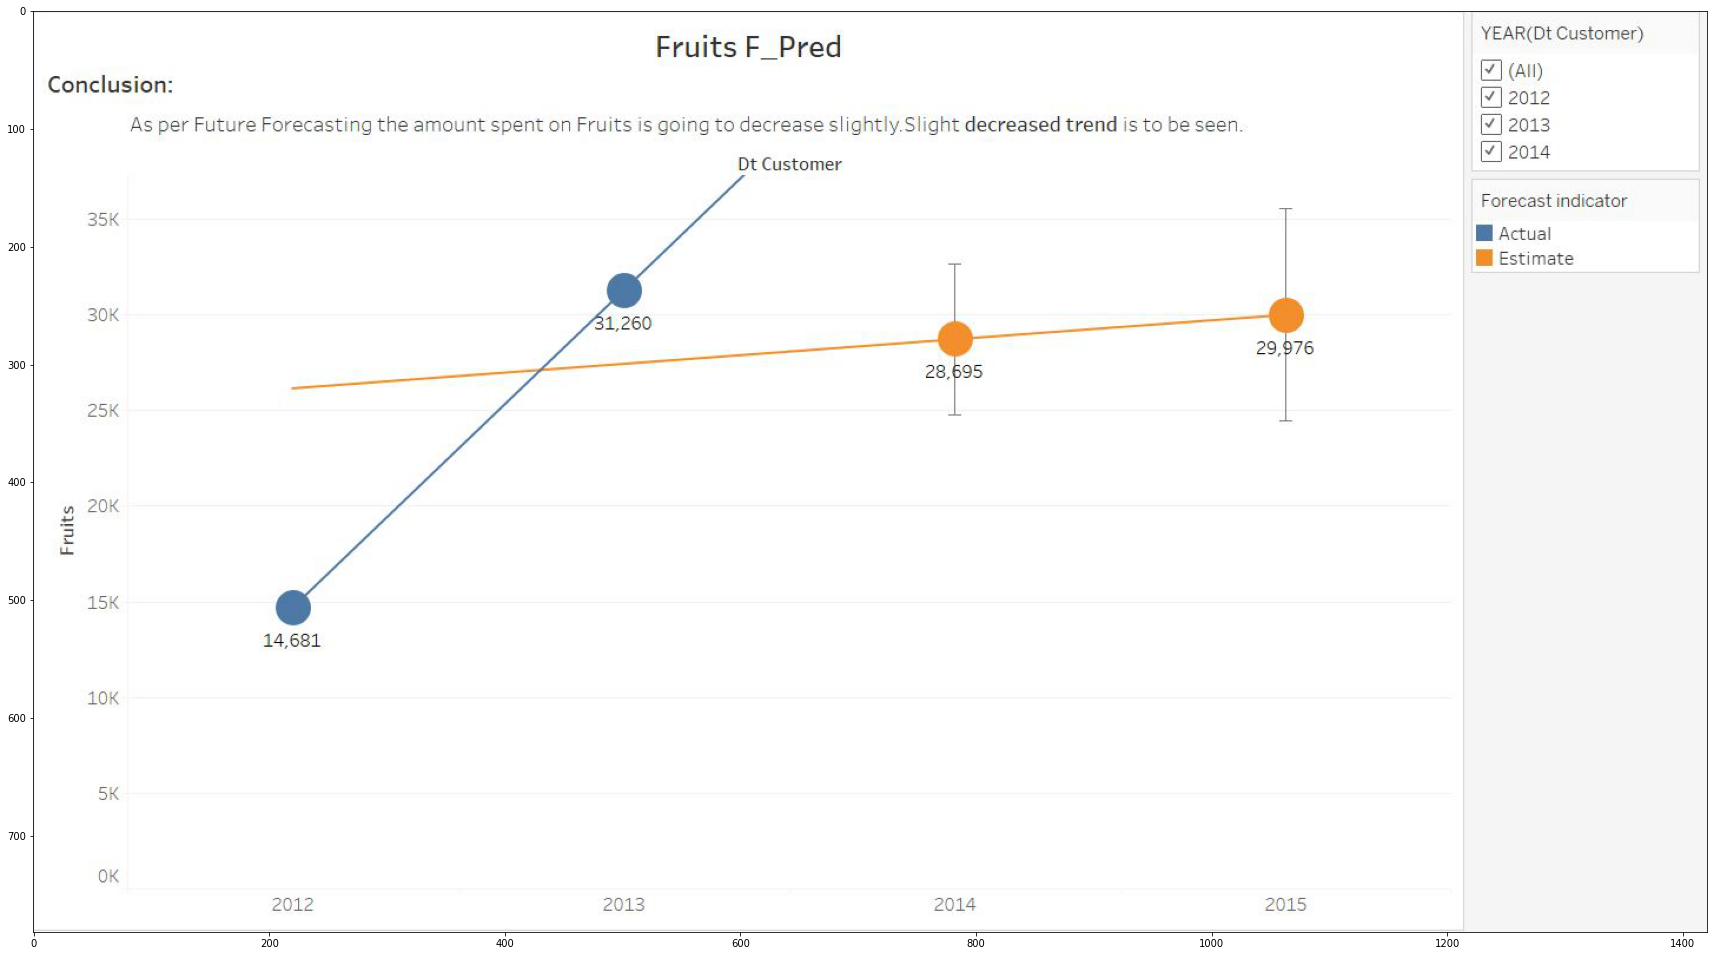

In [99]:
fru = mpimg.imread('/content/sample_data/Capturefruits.JPG')
plt.figure(figsize=(30,20))
plt.imshow(fru)

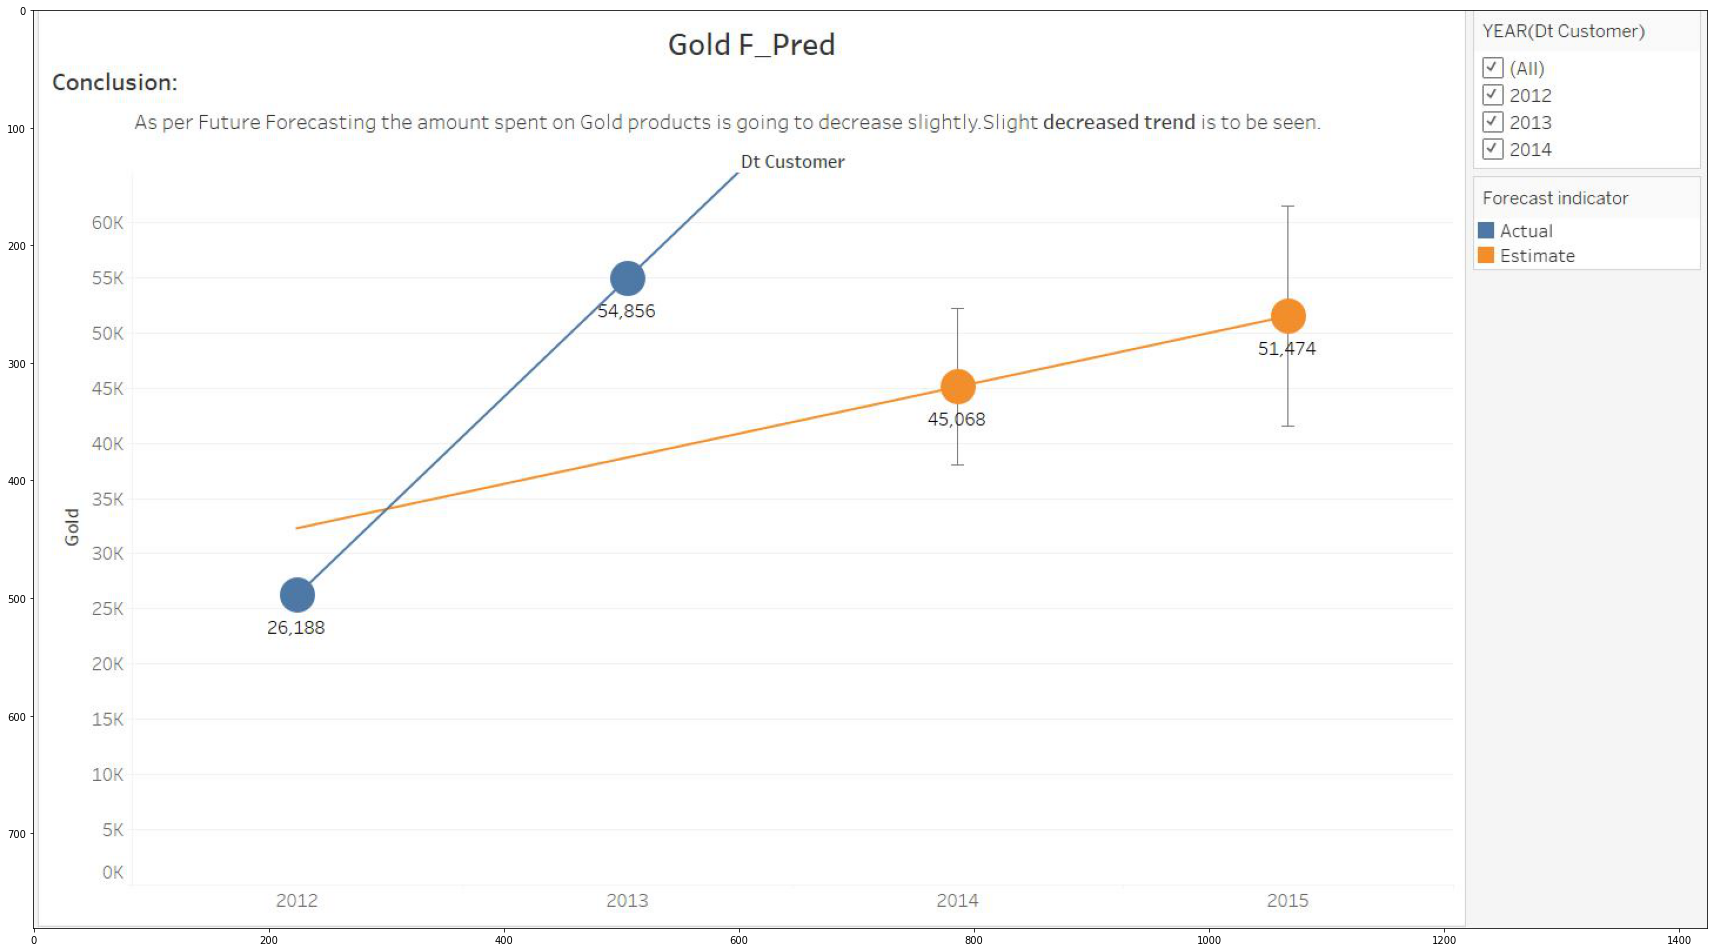

In [100]:
gol = mpimg.imread('/content/sample_data/Capturegold.JPG')
plt.figure(figsize=(30,20))
plt.imshow(gol)

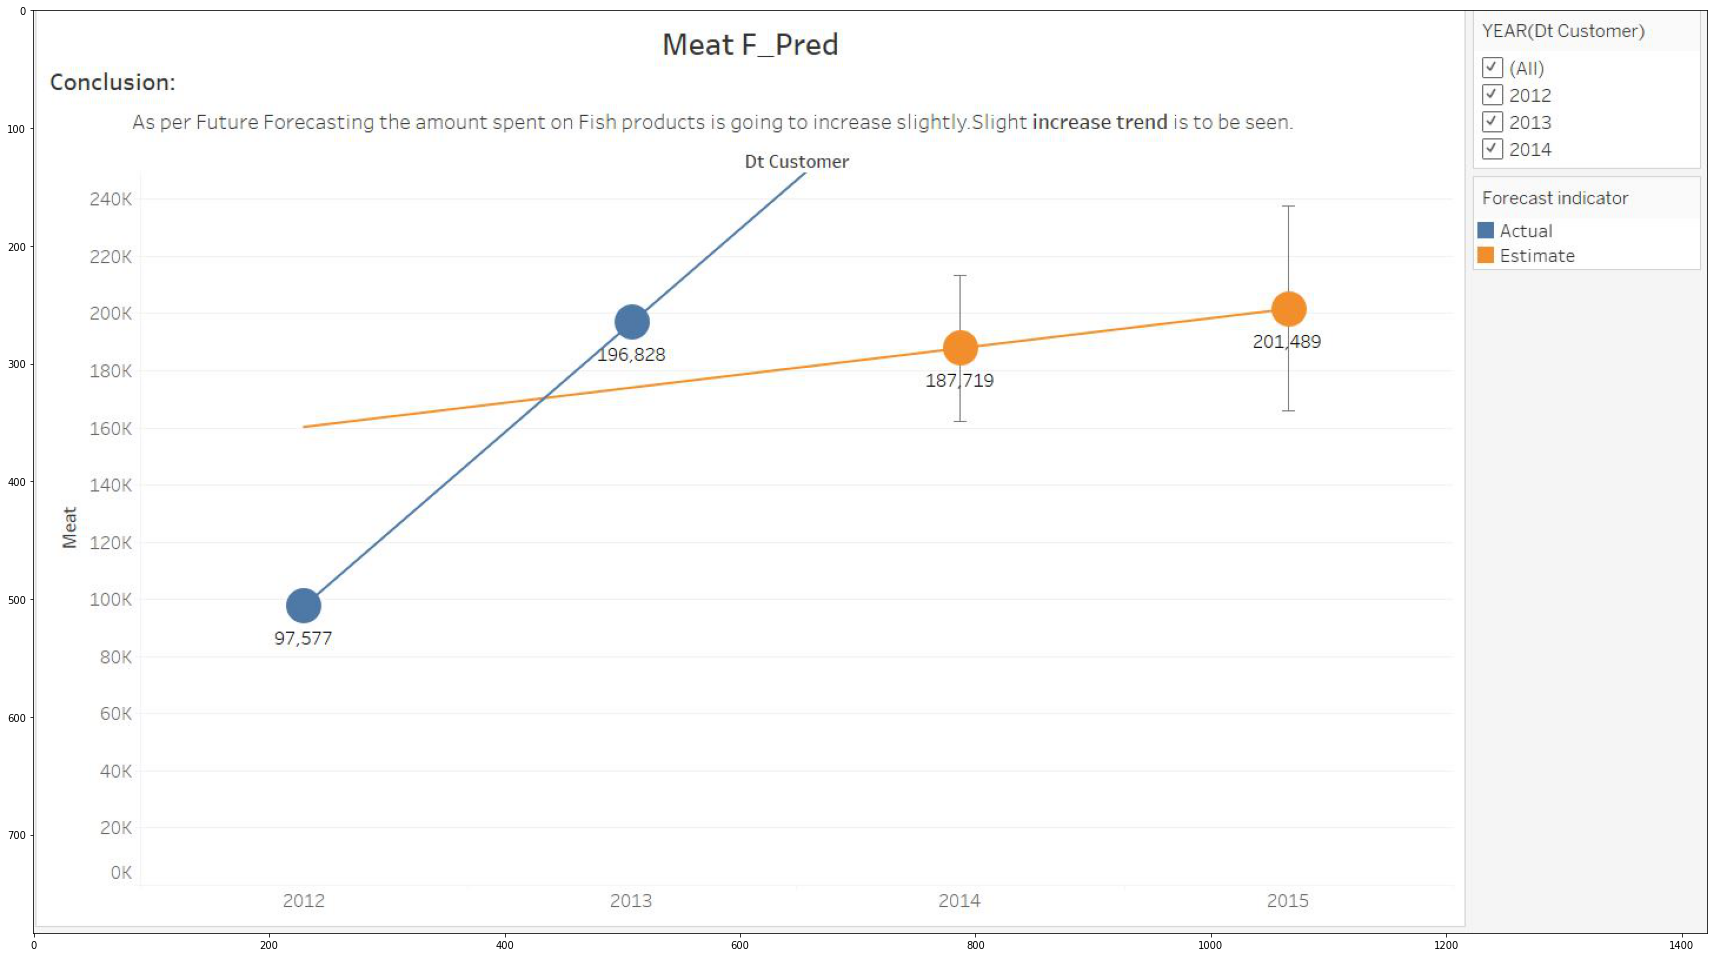

In [101]:
meat = mpimg.imread('/content/sample_data/Capturemeat.JPG')
plt.figure(figsize=(30,20))
plt.imshow(meat)

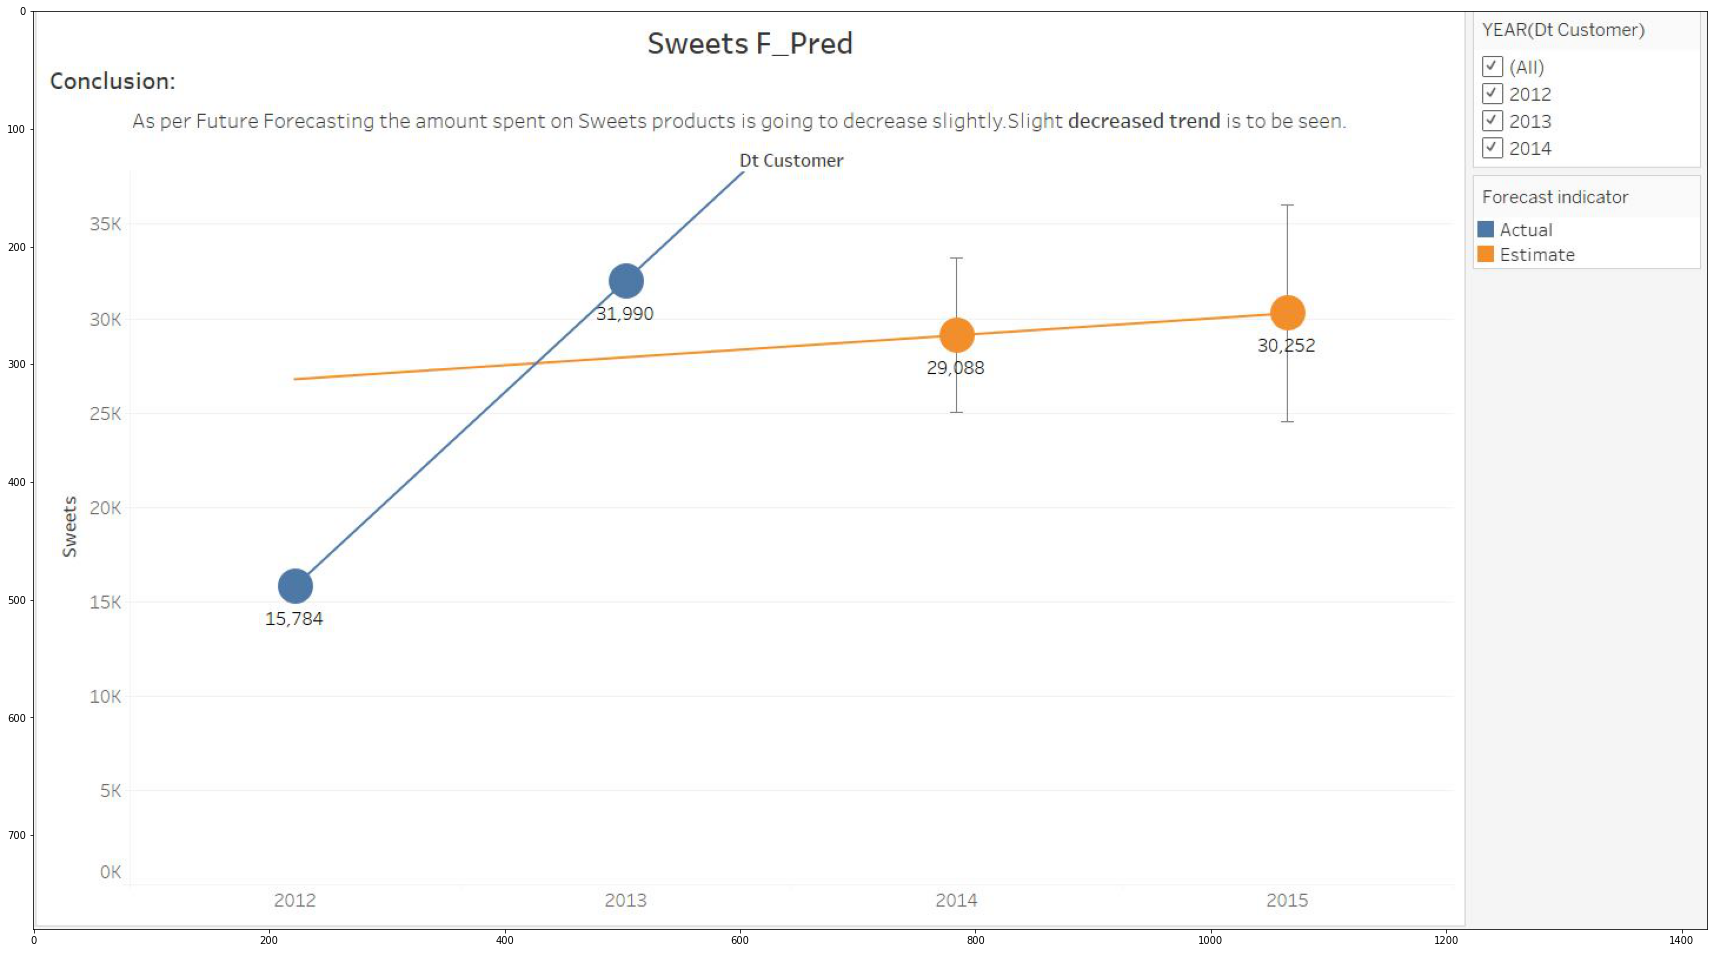

In [102]:
swe = mpimg.imread('/content/sample_data/Capturesweets.JPG')
plt.figure(figsize=(30,20))
plt.imshow(swe)

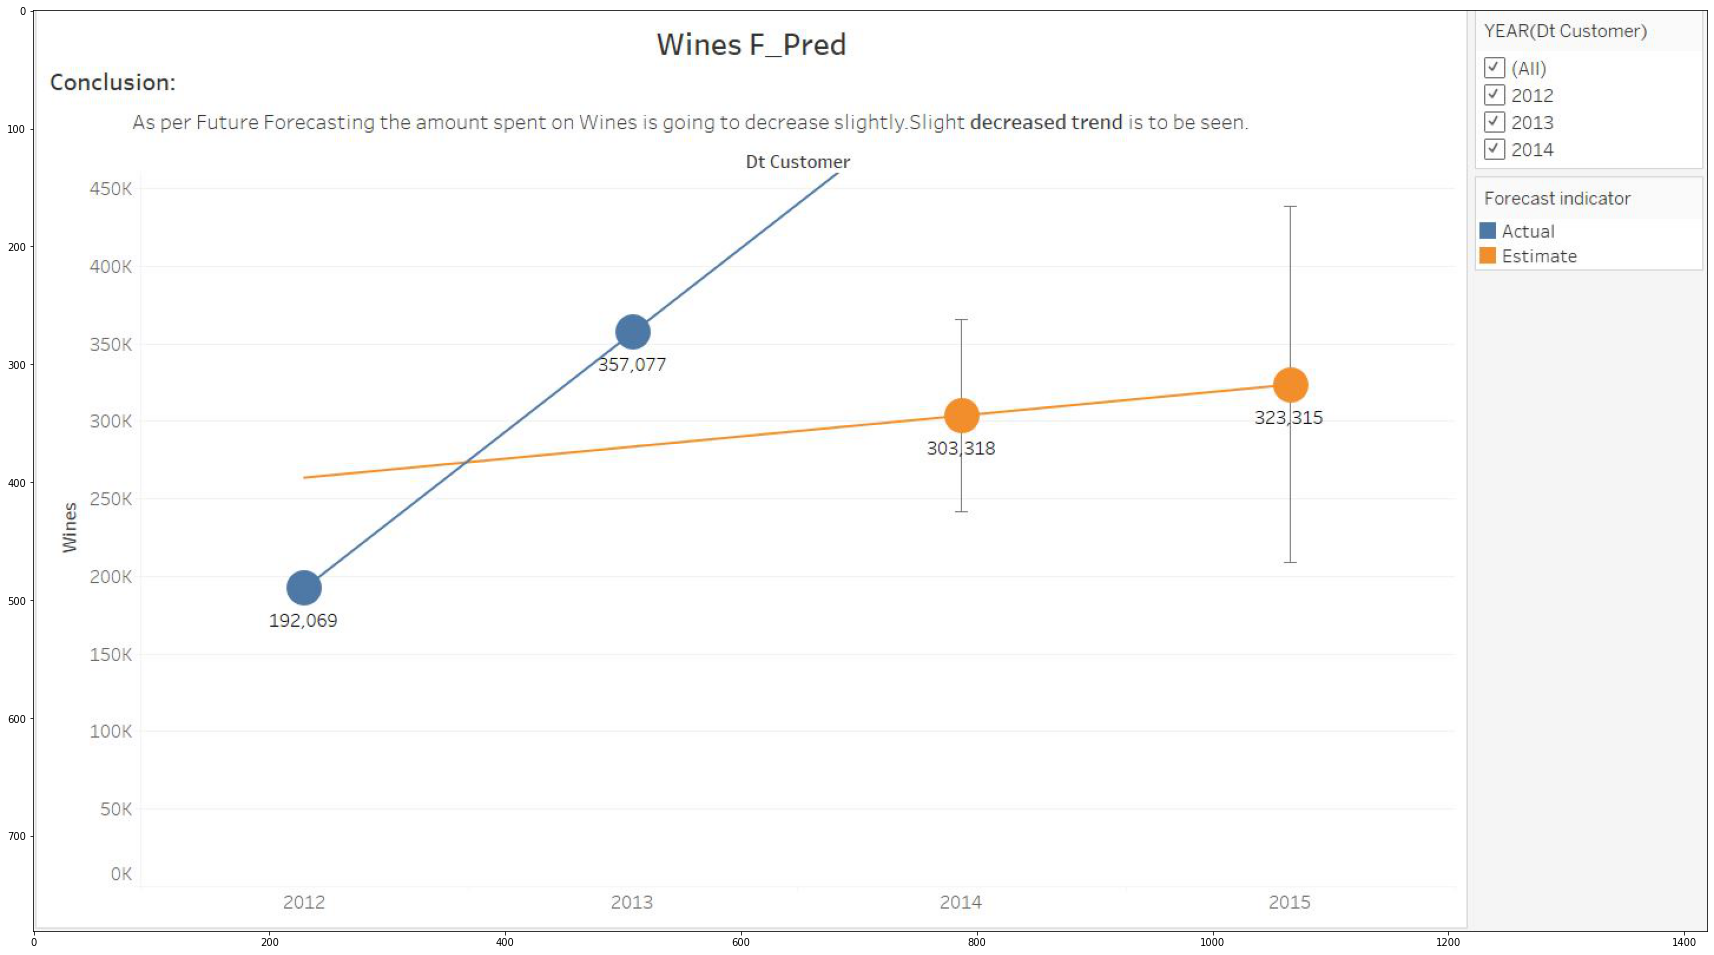

In [103]:
win = mpimg.imread('/content/sample_data/Capturewines.JPG')
plt.figure(figsize=(30,20))
plt.imshow(win)

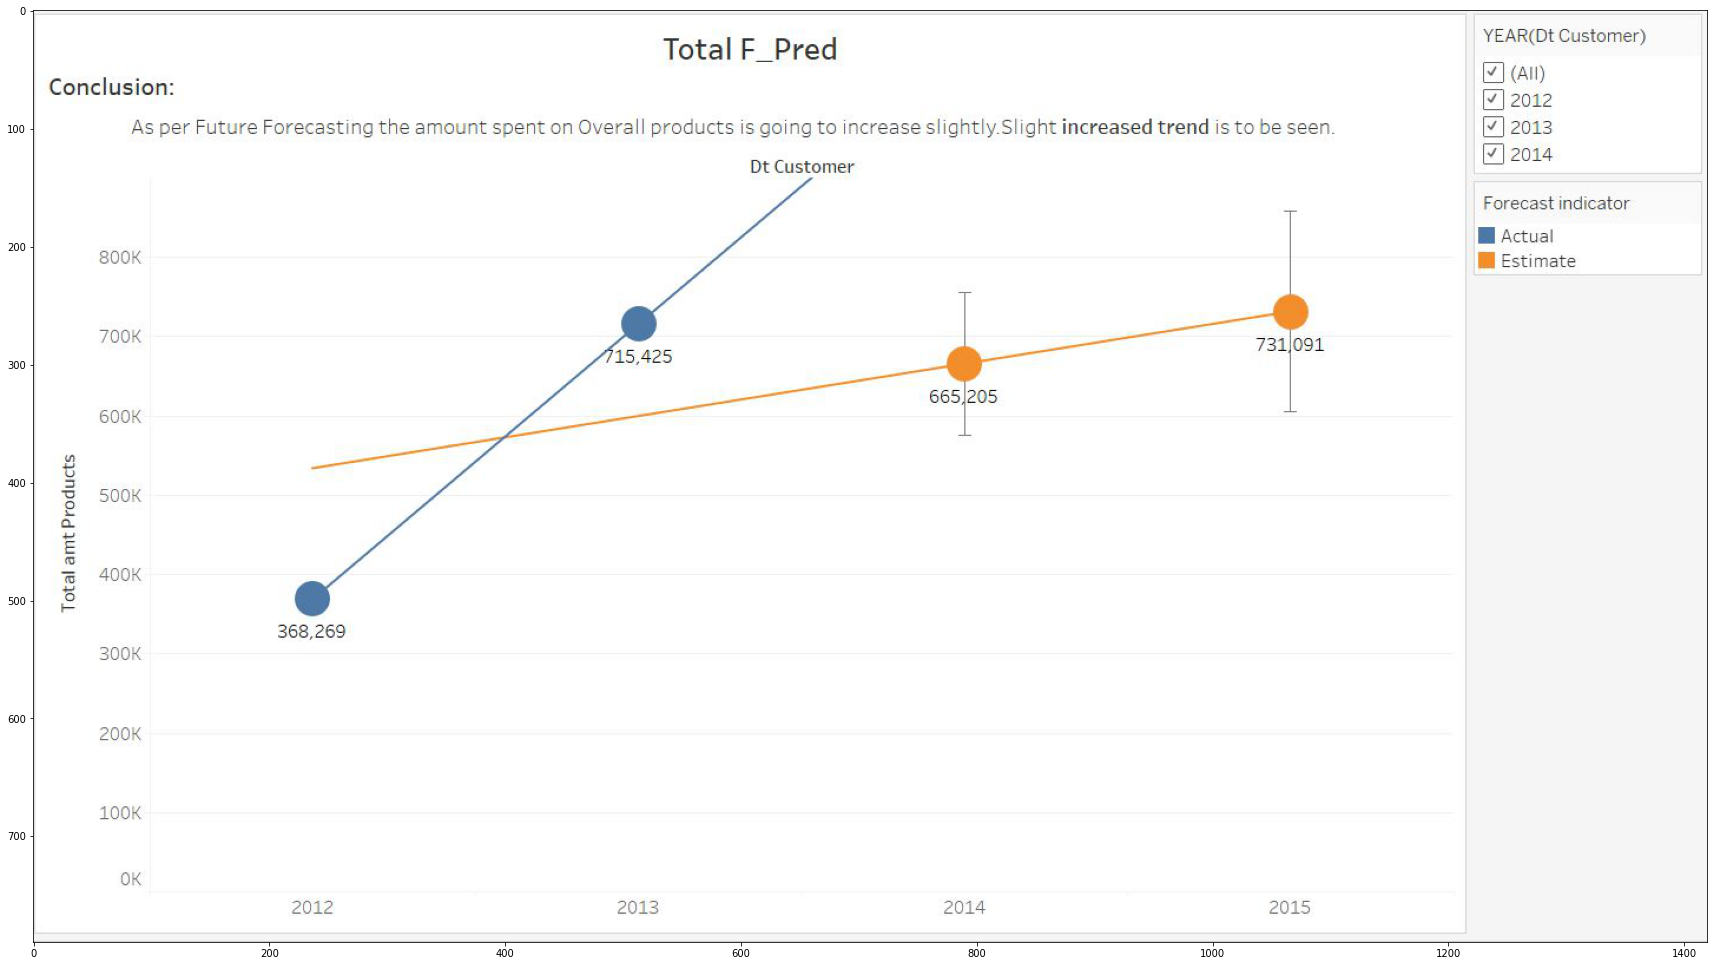

In [104]:
tot = mpimg.imread('/content/sample_data/Capturetotal.JPG')
plt.figure(figsize=(30,20))
plt.imshow(tot)

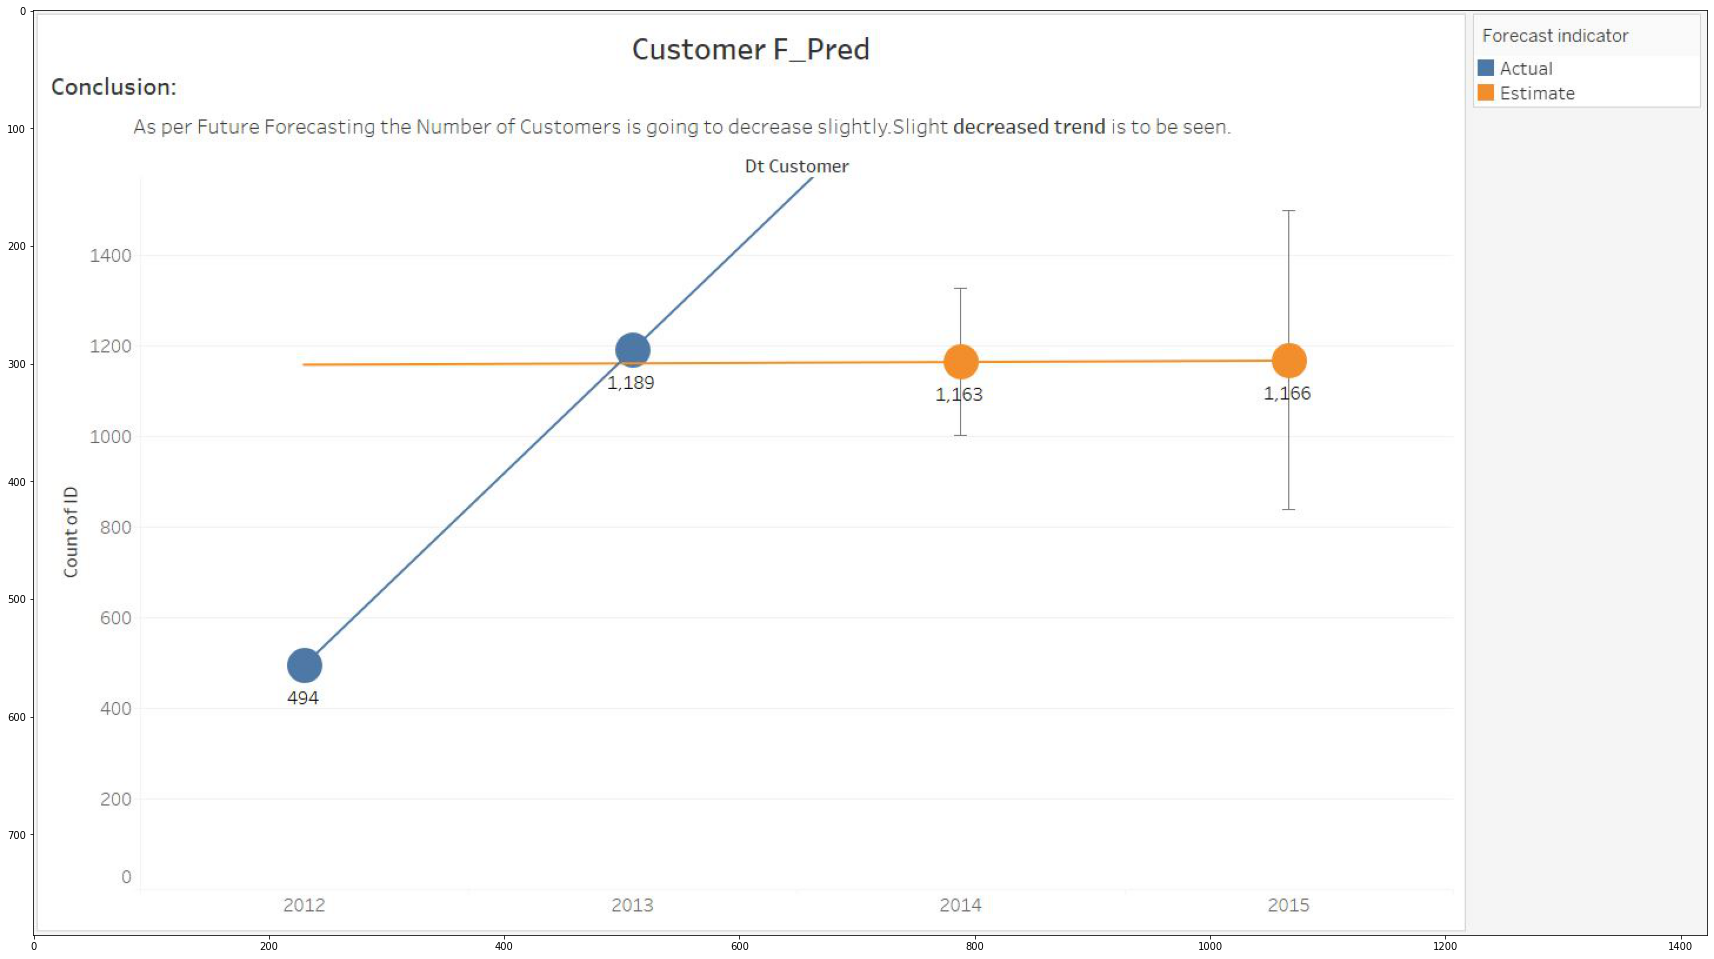

In [105]:
cust = mpimg.imread('/content/sample_data/Capturecust.JPG')
plt.figure(figsize=(30,20))
plt.imshow(cust)

### FUTURE PREDICTIONS FOR PRODUCTS and CUSTOMERS: 
1. The amount spent on Meat products are going to increase. \
2. The amount spent on other products are going to decrease slightly. \
3. The amount spent on total products purchased(more than 1) are going to increase. \
4. The Number of Customers are going to decrease as per the given data.So, to increase the number of Customer some offers, extra services, discounts should be given.